# Imports and setup

In [1]:
import sys
import os
import pandas as pd
import shap


project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from src.explainability.shap_explainer import SHAPExplainer

# Load and prepare data

In [3]:
df = pd.read_csv("../../data/processed/cleaned_balanced_fraud_data.csv")
X = df.drop("class", axis=1)
y = df["class"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train XGBoost model

In [5]:
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# SHAP for explainability

In [6]:
explainer = SHAPExplainer(model=model, X_train=X_train, X_test=X_test, model_type="tree")
shap_values = explainer.fit()

# Global feature importance (summary plot)

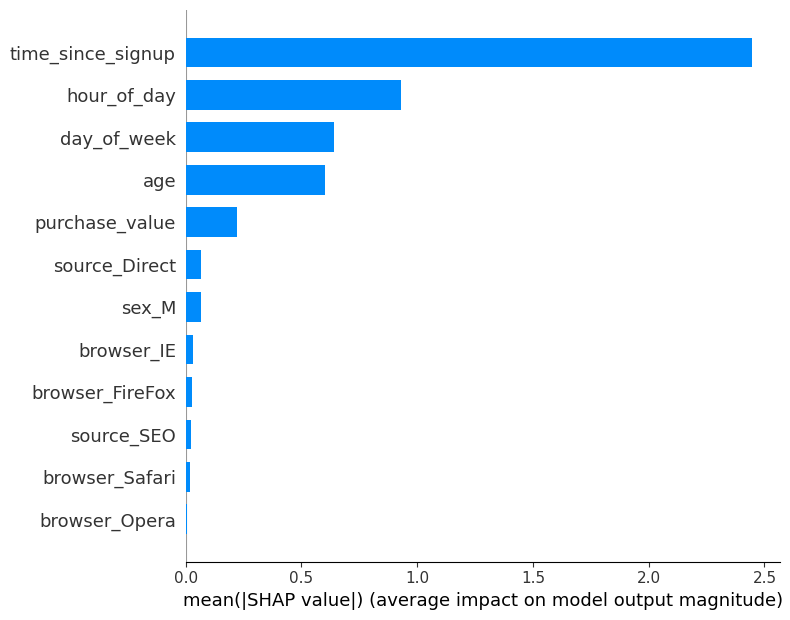

In [7]:
explainer.plot_summary(plot_type="bar")

# Plot force plot for the first instance

In [9]:
force_plot_html = shap.force_plot(
    base_value=shap_values.base_values[0],
    shap_values=shap_values.values[0],
    features=X_test.iloc[0],
    feature_names=X_test.columns,
    matplotlib=False
)
# Save as HTML file
shap.save_html("shap_force_plot_instance0.html", force_plot_html)

## 🔍 SHAP Summary Plot Interpretation

The SHAP summary plot below illustrates the global feature importance based on average impact on the model’s output:

- **`time_since_signup`** is the most critical driver of fraud prediction. Recent sign-ups are more likely to be flagged as fraud.
- **`hour_of_day`** and **`day_of_week`** show that temporal patterns strongly influence predictions.
- **`age`** and **`purchase_value`** also play a notable role, possibly indicating risk tied to certain demographics or high-value transactions.
- Features such as **browser type**, **gender**, and **source channel** have minimal impact on the model’s decisions.

This suggests that behavioral and time-based features are the key signals the XGBoost model uses to detect fraud.
